## Run Regressions using the Cleaned Data

In [1]:
import pandas as pd
import numpy as np
# From: https://towardsdatascience.com/time-based-cross-validation-d259b13d42b8
import timesplit as ts

# import our pipeline file [TO DO: NEEDS TO BE UPDATED TO USE OURS]
import pipeline as pline

import os
cwd = os.getcwd()
cwd

'/Users/sophiamlawer/ML_project/CAPP-30254-Covid-Variants/notebooks'

In [2]:
def read_data(data, date_type=False):
    print(date_type)
    if date_type:
        df = pd.read_csv(data)
    else:
        #parser = lambda date: pd.datetime.strptime(date, '%d%b%Y')
        df = pd.read_csv(data, parse_dates=["date"], dtype={'fips': str})
    return df

X_train = read_data("../Data/Train-Test Set/X_train.csv")
X_test = read_data("../Data/Train-Test Set/X_test.csv")
y_train = read_data("../Data/Train-Test Set/y_train.csv", True)
y_test = read_data("../Data/Train-Test Set/y_test.csv", True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

False
False
True
True
(60694, 16) (15174, 16) (60694, 1) (15174, 1)


In [3]:
X_train.drop("date", axis=1)

,new_cases_7avg,new_cases,2weeksago_cases_7avg,white,age_35_44,age_45_54,cumulative_cases,asian,total_adult_hospitalizations,other_race,prev_day_adult_admit_7daysum,p_white,retail_rec,p_age_65over,prev_day_adult_admit_50-59_7daysum
0,-0.041777,-0.025883,-0.092451,0.399044,0.248686,0.286355,0.518144,0.014908,0.068141,-0.079789,0.129373,-1.175100,0.465945,-0.463055,0.005520
1,-0.093650,-0.095897,-0.166253,0.387644,0.185021,0.247980,-0.139903,-0.061150,-0.168357,-0.081862,-0.159869,0.008818,-0.184131,-0.795400,0.005520
2,-0.152933,-0.151909,-0.181013,-0.103744,-0.117018,-0.114186,-0.192837,-0.138749,-0.221102,-0.103700,-0.266433,0.519772,0.465945,-0.100496,-0.261318
3,-0.108471,-0.186916,-0.085071,-0.227267,-0.193815,-0.203164,-0.071741,-0.149656,-0.221102,-0.064740,-0.266433,0.370225,-0.743197,-0.553694,-0.261318
4,-0.204805,-0.172913,-0.225295,-0.315872,-0.244261,-0.259859,-0.225527,-0.149157,-0.221102,-0.107847,-0.266433,0.856254,-0.528338,1.379952,-0.261318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60689,-0.227036,-0.235925,-0.225295,-0.358565,-0.264562,-0.286598,-0.222245,-0.151696,-0.221102,-0.107278,-0.266433,0.781481,-0.795734,0.352702,-0.261318
60690,-0.197395,-0.109900,-0.195774,0.034117,0.026120,0.012301,-0.215406,-0.037088,-0.156448,-0.082230,-0.220763,-0.751382,-0.899215,-1.339238,-0.261318
60691,-0.249267,-0.228924,-0.240055,-0.342715,-0.257547,-0.278362,-0.193293,-0.150156,-0.221102,-0.107880,-0.266433,0.395149,1.124773,1.228886,-0.261318
60692,-0.189984,-0.172913,-0.173633,-0.127490,-0.131663,-0.130407,-0.058200,-0.117268,-0.200685,-0.097413,-0.220763,-0.128267,1.181029,-0.311989,-0.261318


In [4]:
import datetime
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.pipeline import Pipeline
# define scoring metrics
scoring_metrics = ["neg_mean_squared_error", "r2", "neg_mean_absolute_error"]

### Single Regression as a Test

In [5]:
rf = RandomForestRegressor(random_state = 10)
rf.fit(X_train.drop("date", axis=1), y_train)
Y_pred = rf.predict(X_train.drop("date", axis=1))  # test the output by changing values
print("MAE: ",mean_absolute_error(y_train, Y_pred))
print("MSE: ",mean_squared_error(y_train, Y_pred))
print("R2: ",r2_score(y_train, Y_pred))

<ipython-input-5-65f3bc84fb4d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train.drop("date", axis=1), y_train)


MAE:  1.3756996851497048
MSE:  27.474503085518304
R2:  0.9985261032967704


In [6]:
Y_pred_test = rf.predict(X_test.drop("date", axis=1))  # test the output by changing values
print("MAE: ",mean_absolute_error(y_test, Y_pred_test))
print("MSE: ",mean_squared_error(y_test, Y_pred_test))
print("R2: ",r2_score(y_test, Y_pred_test))

MAE:  3.5237051268774278
MSE:  170.51998062019624
R2:  0.9876493444836298


### Time - Based Split

In [7]:
# set up time-based CV indices
tscv = ts.TimeBasedCV(train_period=21,
                      test_period=7,
                      freq='days')

tscv_indices = []

for train_index, test_index in tscv.split(X_train, date_column='date'):
    tscv_indices.append((train_index, test_index))

In [8]:
from sklearn.model_selection import GridSearchCV
pipe = Pipeline([('rf', RandomForestRegressor())])
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
scoring_metrics = ["neg_mean_squared_error", "r2", "neg_mean_absolute_error"]

param_grid = {
    'rf__criterion': ['mse', 'mae'],
    'rf__max_features': ['auto', 'sqrt', "log2"],
    'rf__max_depth': [None, 5, 10],
    'rf__min_samples_split': [2, 5],
    'rf__random_state': [10]
}

print("Start: ", datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

rf_search = GridSearchCV(pipe, param_grid, cv=tscv_indices, scoring=scoring_metrics, refit = False, n_jobs=2, verbose=2)
rf_search.fit(X_train.drop(columns=["date"]), np.ravel(y_train))

print("End: ", datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S"))

Start:  29/05/2021 23:15:34
Fitting 32 folds for each of 72 candidates, totalling 2304 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:  3.6min
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:  5.1min
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:  6.4min
[Parallel(n_jobs=2)]: Done 1009 tasks      | elapsed:  9.9min
[Parallel(n_jobs=2)]: Done 1454 tasks      | elapsed: 679.4min
[Parallel(n_jobs=2)]: Done 1981 tasks      | elapsed: 856.7min


End:  30/05/2021 15:40:30


[Parallel(n_jobs=2)]: Done 2304 out of 2304 | elapsed: 984.9min finished


In [11]:
def GridSearchSummary(search, hyperparams, metrics, file):
    """
    Creates a dataframe with summary results from GridSearchCV
    search - the final GridSearchCV object
    hyperparams - the list of parameters you were tuning for (aka keys in the param_grid dictionary)
    metrics - the list of scoring metrics you used
    file - filename of where you want to save your results
    """
    
    summary = pd.DataFrame()
    
    for hyperparam in hyperparams:
        col = [dct[hyperparam] for dct in search.cv_results_["params"]]
        summary[hyperparam] = col
    
    for metric in metrics:
        col = search.cv_results_["mean_test_" + metric]
        summary[metric] = col
    
    summary.to_csv(file)
    
    return summary

In [16]:
rf_summary = GridSearchSummary(rf_search, 
                  ["rf__criterion", "rf__max_features", "rf__max_depth", "rf__min_samples_split"],
                  scoring_metrics,
                  "rf_search.csv")

#print(rf_search.best_estimator_)
rf_summary.sort_values(by=["neg_mean_absolute_error"], ascending=False)

,rf__criterion,rf__max_features,rf__max_depth,rf__min_samples_split,neg_mean_squared_error,r2,neg_mean_absolute_error
3,mse,sqrt,NaN,2,-974.920992,0.944697,-7.521976
6,mse,log2,NaN,2,-974.920992,0.944697,-7.521976
39,mae,sqrt,NaN,2,-959.716308,0.945919,-7.530359
42,mae,log2,NaN,2,-959.716308,0.945919,-7.530359
36,mae,auto,NaN,2,-902.199530,0.949379,-7.582760
...,...,...,...,...,...,...,...
13,mse,sqrt,1.0,5,-6619.125780,0.657673,-33.520552
12,mse,sqrt,1.0,2,-6619.125780,0.657673,-33.520552
10,mse,auto,1.0,5,-6630.109158,0.653020,-33.588305
11,mse,auto,1.0,10,-6630.109158,0.653020,-33.588305


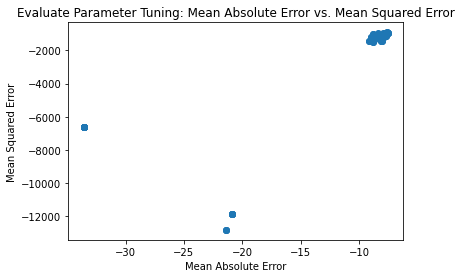

In [22]:
import matplotlib.pyplot as plt
plt.scatter(rf_summary['neg_mean_absolute_error'], rf_summary['neg_mean_squared_error'])
plt.xlabel("Mean Absolute Error")
plt.ylabel("Mean Squared Error")
plt.title("Evaluate Parameter Tuning: Mean Absolute Error vs. Mean Squared Error")
plt.show()

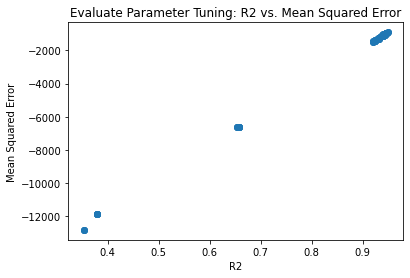

In [23]:
import matplotlib.pyplot as plt
plt.scatter(rf_summary['r2'], rf_summary['neg_mean_squared_error'])
plt.xlabel("R2")
plt.ylabel("Mean Squared Error")
plt.title("Evaluate Parameter Tuning: R2 vs. Mean Squared Error")
plt.show()

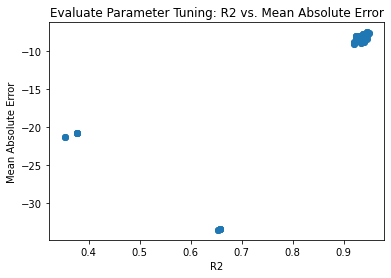

In [24]:
import matplotlib.pyplot as plt
plt.scatter(rf_summary['r2'], rf_summary['neg_mean_absolute_error'])
plt.xlabel("R2")
plt.ylabel("Mean Absolute Error")
plt.title("Evaluate Parameter Tuning: R2 vs. Mean Absolute Error")
plt.show()

In [32]:
def highlight_large(s):
    '''
    highlight large values greater than some threshold.
    '''
    is_large = s.abs() > 0.93
    return ['background-color: yellow' if v else '' for v in is_large]

rf_summary[["r2"]].style.apply(highlight_large)

,r2
0,0.947522
1,0.942545
2,0.930858
3,0.944697
4,0.937510
5,0.924092
6,0.944697
7,0.937510
8,0.924092
9,0.653020


In [35]:
pd.set_option('display.max_rows', None)
rf_summary.sort_values(by=["neg_mean_absolute_error"], ascending=False)

,rf__criterion,rf__max_features,rf__max_depth,rf__min_samples_split,neg_mean_squared_error,r2,neg_mean_absolute_error
3,mse,sqrt,NaN,2,-974.920992,0.944697,-7.521976
6,mse,log2,NaN,2,-974.920992,0.944697,-7.521976
39,mae,sqrt,NaN,2,-959.716308,0.945919,-7.530359
42,mae,log2,NaN,2,-959.716308,0.945919,-7.530359
36,mae,auto,NaN,2,-902.199530,0.949379,-7.582760
69,mae,log2,10.0,2,-974.260981,0.945898,-7.631968
66,mae,sqrt,10.0,2,-974.260981,0.945898,-7.631968
63,mae,auto,10.0,2,-908.624882,0.948606,-7.632856
0,mse,auto,NaN,2,-935.109799,0.947522,-7.648929
27,mse,auto,10.0,2,-921.987065,0.948129,-7.699737
